# Data Wrangling
Alejandro Ruiz y Pablo Toledano

### Importación de librerías

In [29]:
from pymongo import MongoClient
import pandas as pd
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt

### Conexión con Base de Datos y carga en dataframe

Realizamos la conexión a la base de datos de MongoDB donde se han ido realizando los volcados de información del portal de datos del ayuntamiento de Madrid. La carga de datos puede conllevar un tiempo, así que toca ser pacientes.

In [3]:
client = MongoClient('REDACTED')
db = client.DatosII
papeleras = db.papeleras
cursor = papeleras.find()
df =  pd.DataFrame(list(cursor))
df

_id tipoResiduo  \
0       622349d40040a9fb231925b4       resto   
1       622349d50040a9fb231925b5       resto   
2       622349d50040a9fb231925b6       resto   
3       622349d50040a9fb231925b7     envases   
4       622349d50040a9fb231925b8     envases   
...                          ...         ...   
774794  624589de3ef517ec74b72811     envases   
774795  624589de3ef517ec74b72812     envases   
774796  624589de3ef517ec74b72813     envases   
774797  624589de3ef517ec74b72814       resto   
774798  624589de3ef517ec74b72815       resto   

                                           direccion           longitud  \
0       Pza. Mercurio FTE. Junta Municpal De Barajas  -3.57796317595808   
1          Manuel Machado CV Alcalde Luis Marichalar  -3.65939877040543   
2                                    Peña Gorbea N°2  -3.66887580360043   
3              Estacion Cercanias Asamblea De Madrid  -3.66818481961283   
4                              José Del Hierro N° 52  -3.64392377324389   
...                                              ...                ...   
774794         Alberique CV Amposta (Metro Simancas)  -3.62294238699103   
774795        José Del Hierro S/N (Parque El Calero)  -3.65082362232926   
774796                  Plaza Carlos Trías Bertrán 4  -3.69424646172014   
774797                                     Orense 79  -3.69439213189436   
774798              Alcalá CV Canillejas A Vicalvaro  -3.61699884084309   

                 latitud nivelLlenado alerta                         fecha  \
0       40.4745326748698            0         2022-03-05T11:47:50.000+0100   
1       40.4113557824348            2         2022-03-05T11:38:16.000+0100   
2        40.398386107057            4         2022-03-05T11:25:06.000+0100   
3       40.3818872494024            0         2022-03-05T11:59:27.000+0100   
4       40.4401409362563            0         2022-03-05T12:00:08.000+0100   
...                  ...          ...    ...                           ...   
774794  40.4275671692854            2         2022-03-31T12:04:02.000+0200   
774795  40.4360754933235            0         2022-03-31T10:32:39.000+0200   
774796  40.4510569395695            4         2022-03-31T11:54:28.000+0200   
774797   40.459556109569            4         2022-03-31T11:12:10.000+0200   
774798  40.4435505821135            2         2022-03-31T00:37:40.000+0200   

       idPapelera  
0         1517391  
1         1521210  
2         1522416  
3         1522423  
4         1522705  
...           ...  
774794    1525741  
774795    1525742  
774796    1525744  
774797    1525743  
774798    1530208  

[774799 rows x 9 columns]

### Acomodamiento de datos

Se adapta cada columna al tipo de dato que corresponde, ya que posteriormente nos servirá para manipular de una forma más cómoda el dataset

In [4]:
df['longitud'] = pd.to_numeric(df['longitud'])
df['latitud'] = pd.to_numeric(df['latitud'])
df['nivelLlenado'] = pd.to_numeric(df['nivelLlenado'])
df['fecha'] = pd.to_datetime(df['fecha'])
df.dtypes

_id              object
tipoResiduo      object
direccion        object
longitud        float64
latitud         float64
nivelLlenado      int64
alerta           object
fecha            object
idPapelera       object
dtype: object

Se elimina el id usado internamente por MongoDB en sus entradas. No es necesario para la carga y procesado de datos con Pandas. Además, ese valor puede dificultar la busqueda de entradas duplicadas.

In [5]:
del df["_id"]
len(df)

774799

Originariamente el dataframe está formado por 774799 filas. Como los datos fueron sacados con un script que se descargaba el estado actual de las papeleras cada cierto tiempo pueden existir duplicados. Estos duplicados coinciden con ocasiones en los que el estado de la papelera no ha cambiado respecto a la última ejecución del script.

In [7]:
df.duplicated().sum()

374080

In [6]:
df = df.drop_duplicates()
df = df.reset_index(drop=True)
df

tipoResiduo                                     direccion  longitud  \
0            resto  Pza. Mercurio FTE. Junta Municpal De Barajas -3.577963   
1            resto     Manuel Machado CV Alcalde Luis Marichalar -3.659399   
2            resto                               Peña Gorbea N°2 -3.668876   
3          envases         Estacion Cercanias Asamblea De Madrid -3.668185   
4          envases                         José Del Hierro N° 52 -3.643924   
...            ...                                           ...       ...   
400714       resto     Castrogeriz N°7 FTE. Avda. Plaza De Toros -3.739683   
400715     envases           Paseo Infanta Isabel Cv Alfonso XII -3.689215   
400716     envases         Alberique CV Amposta (Metro Simancas) -3.622942   
400717     envases                  Plaza Carlos Trías Bertrán 4 -3.694246   
400718       resto                                     Orense 79 -3.694392   

          latitud  nivelLlenado alerta                      fecha idPapelera  
0       40.474533             0         2022-03-05 11:47:50+01:00    1517391  
1       40.411356             2         2022-03-05 11:38:16+01:00    1521210  
2       40.398386             4         2022-03-05 11:25:06+01:00    1522416  
3       40.381887             0         2022-03-05 11:59:27+01:00    1522423  
4       40.440141             0         2022-03-05 12:00:08+01:00    1522705  
...           ...           ...    ...                        ...        ...  
400714  40.386554             0         2022-03-31 11:13:59+02:00    1525737  
400715  40.407540             0         2022-03-31 11:40:20+02:00    1525738  
400716  40.427567             2         2022-03-31 12:04:02+02:00    1525741  
400717  40.451057             4         2022-03-31 11:54:28+02:00    1525744  
400718  40.459556             4         2022-03-31 11:12:10+02:00    1525743  

[400719 rows x 8 columns]

Después de eliminar duplicados se observa que el número de muestras desciende a 400719 de las 774799 originales.

El conjunto de datos no presenta valores nulos. Por lo que no hay que aplicar ningun tratamiento en este sentido

In [9]:
df.isnull().sum()

tipoResiduo     0
direccion       0
longitud        0
latitud         0
nivelLlenado    0
alerta          0
fecha           0
idPapelera      0
dtype: int64

Se va a transformar la variable categórica tipoResudio a una variable numérica. Para ello se va a transformar siguiendo One Hot Encoding

In [7]:
y = pd.get_dummies(df.tipoResiduo, prefix='tipoResiduo')
y

tipoResiduo_envases  tipoResiduo_resto
0                         0                  1
1                         0                  1
2                         0                  1
3                         1                  0
4                         1                  0
...                     ...                ...
400714                    0                  1
400715                    1                  0
400716                    1                  0
400717                    1                  0
400718                    0                  1

[400719 rows x 2 columns]

In [8]:
df = df.drop('tipoResiduo',axis = 1)
df = df.join(y)
df

direccion  longitud    latitud  \
0       Pza. Mercurio FTE. Junta Municpal De Barajas -3.577963  40.474533   
1          Manuel Machado CV Alcalde Luis Marichalar -3.659399  40.411356   
2                                    Peña Gorbea N°2 -3.668876  40.398386   
3              Estacion Cercanias Asamblea De Madrid -3.668185  40.381887   
4                              José Del Hierro N° 52 -3.643924  40.440141   
...                                              ...       ...        ...   
400714     Castrogeriz N°7 FTE. Avda. Plaza De Toros -3.739683  40.386554   
400715           Paseo Infanta Isabel Cv Alfonso XII -3.689215  40.407540   
400716         Alberique CV Amposta (Metro Simancas) -3.622942  40.427567   
400717                  Plaza Carlos Trías Bertrán 4 -3.694246  40.451057   
400718                                     Orense 79 -3.694392  40.459556   

        nivelLlenado alerta                      fecha idPapelera  \
0                  0         2022-03-05 11:47:50+01:00    1517391   
1                  2         2022-03-05 11:38:16+01:00    1521210   
2                  4         2022-03-05 11:25:06+01:00    1522416   
3                  0         2022-03-05 11:59:27+01:00    1522423   
4                  0         2022-03-05 12:00:08+01:00    1522705   
...              ...    ...                        ...        ...   
400714             0         2022-03-31 11:13:59+02:00    1525737   
400715             0         2022-03-31 11:40:20+02:00    1525738   
400716             2         2022-03-31 12:04:02+02:00    1525741   
400717             4         2022-03-31 11:54:28+02:00    1525744   
400718             4         2022-03-31 11:12:10+02:00    1525743   

        tipoResiduo_envases  tipoResiduo_resto  
0                         0                  1  
1                         0                  1  
2                         0                  1  
3                         1                  0  
4                         1                  0  
...                     ...                ...  
400714                    0                  1  
400715                    1                  0  
400716                    1                  0  
400717                    1                  0  
400718                    0                  1  

[400719 rows x 9 columns]

### Tratamiento de datos y visualización

Veamos ahora el número de veces que aparece cada papelera en la base de datos:

In [12]:
papeleras_frecuentes = df.groupby('idPapelera')['idPapelera'].count().reset_index(name='Count').sort_values('Count', ascending=False)
papeleras_frecuentes

idPapelera  Count
39     1523115    351
851    1524939    349
210    1523589    347
338    1523941    347
3      1522423    347
..         ...    ...
580    1524425     54
236    1523817     54
102    1523234     54
417    1524094     52
710    1524792     36

[1301 rows x 2 columns]

Vemos que la papelera 1523115 es la que tiene más registros en la base de datos. Vamos a aislarla:

In [13]:
papelera1 = df.loc[df['idPapelera'] == "1523115"]
papelera1 = papelera1.reset_index(drop=True)
papelera1

direccion  longitud    latitud  nivelLlenado alerta  \
0    Gran Vía 31 -3.703884  40.420092             0          
1    Gran Vía 31 -3.703884  40.420092             2          
2    Gran Vía 31 -3.703884  40.420092             2          
3    Gran Vía 31 -3.703884  40.420092             2          
4    Gran Vía 31 -3.703884  40.420092             2          
..           ...       ...        ...           ...    ...   
346  Gran Vía 31 -3.703884  40.420092             0          
347  Gran Vía 31 -3.703884  40.420092             0          
348  Gran Vía 31 -3.703884  40.420092             0          
349  Gran Vía 31 -3.703884  40.420092             0          
350  Gran Vía 31 -3.703884  40.420092             0          

                         fecha idPapelera  tipoResiduo_envases  \
0    2022-03-05 11:26:08+01:00    1523115                    1   
1    2022-03-06 17:05:16+01:00    1523115                    1   
2    2022-03-06 18:37:15+01:00    1523115                    1   
3    2022-03-06 23:12:38+01:00    1523115                    1   
4    2022-03-07 00:44:17+01:00    1523115                    1   
..                         ...        ...                  ...   
346  2022-03-31 05:49:47+02:00    1523115                    1   
347  2022-03-31 07:21:26+02:00    1523115                    1   
348  2022-03-31 08:54:02+02:00    1523115                    1   
349  2022-03-31 10:25:41+02:00    1523115                    1   
350  2022-03-31 11:57:16+02:00    1523115                    1   

     tipoResiduo_resto  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
..                 ...  
346                  0  
347                  0  
348                  0  
349                  0  
350                  0  

[351 rows x 9 columns]

Una vez aislada, podemos realizar operaciones y visualizaciones. Al tratar de series temporales, la papelera tendrá llenados y vaciados a lo largo del tiempo. Veamos el estado de llenado según el tiempo:

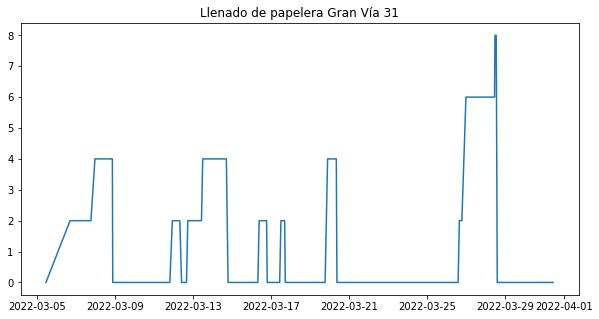

In [14]:
ts = papelera1[['nivelLlenado','fecha']]
ts.dtypes
plt.figure(figsize=(10,5))
plt.plot(ts.fecha,ts.nivelLlenado)
plt.title("Llenado de papelera Gran Vía 31")
plt.show()

Las papeleras cuentan con unas coordenada geoespaciales, por lo que podemos ver en un mapa las posiciones de las papeleras.

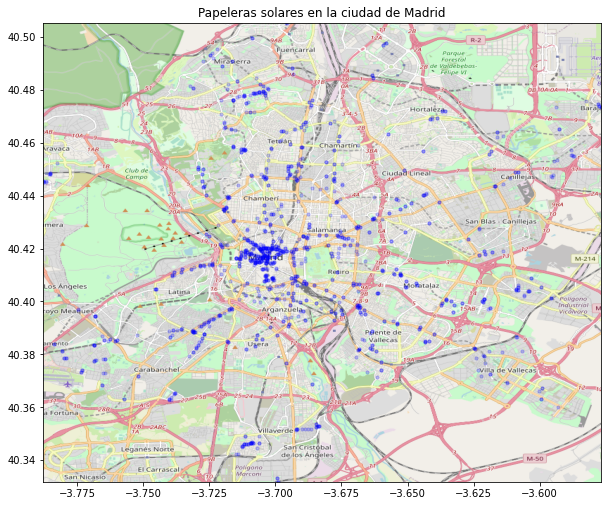

In [15]:
papeleras_unicas = df.drop_duplicates(subset=['idPapelera'])

BBox = (papeleras_unicas.longitud.min(),   papeleras_unicas.longitud.max(),      
         papeleras_unicas.latitud.min(), papeleras_unicas.latitud.max())

mapa_madrid = plt.imread('./map.png')

fig, ax = plt.subplots(figsize = (10,10))
ax.scatter(papeleras_unicas.longitud, papeleras_unicas.latitud, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Papeleras solares en la ciudad de Madrid')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(mapa_madrid, zorder=0, extent = BBox, aspect= 'equal')


El campo "alerta" de una papelera nos devuelve si una papelera está llena o tiene un error. Podemos ver de forma gráfica qué papeleras o zonas son más susceptibles de sufrir errores, y por tanto es importante tener atención especial sobre ellas.

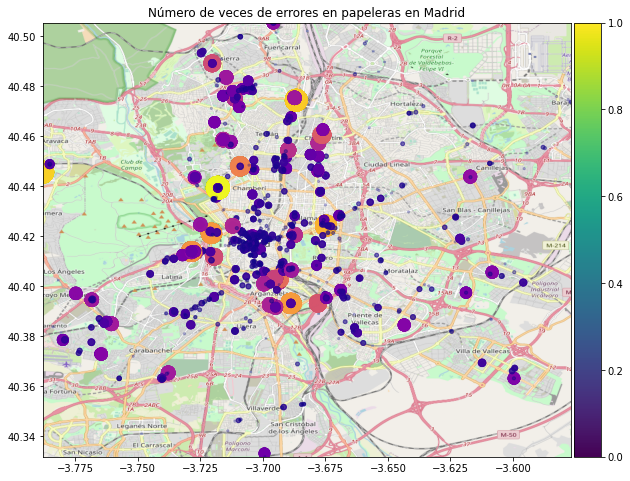

In [16]:
papeleras_rotas = df.loc[df['alerta'] == 'ERROR']
veces_rotas = papeleras_rotas.groupby('idPapelera')['alerta'].count().reset_index(name='Count')
merged_rotas = pd.merge(left=papeleras_rotas, right=veces_rotas, left_on='idPapelera', right_on='idPapelera')

BBox = (papeleras_unicas.longitud.min(),   papeleras_unicas.longitud.max(),      
         papeleras_unicas.latitud.min(), papeleras_unicas.latitud.max())

mapa_madrid = plt.imread('./map.png')

fig, ax = plt.subplots(figsize = (10,10))
size = merged_rotas['Count'].to_numpy()
s = [5*s for s in size]
ax.scatter(merged_rotas.longitud, merged_rotas.latitud, zorder=1, alpha= 0.25, c=merged_rotas.Count, cmap='plasma', s=s)
ax.set_title('Número de veces de errores en papeleras en Madrid')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
im = ax.imshow(mapa_madrid, zorder=0, extent = BBox, aspect= 'equal')

divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax, orientation='vertical')

A continuación, veamos lo mismo pero con las papeleras que están llenas. Esto nos puede servir para reforzar ciertas zonas con Servicio de Recogida de Residuos Sólidos Urbanos, y así optimizar de primera forma las rutas de recogida.

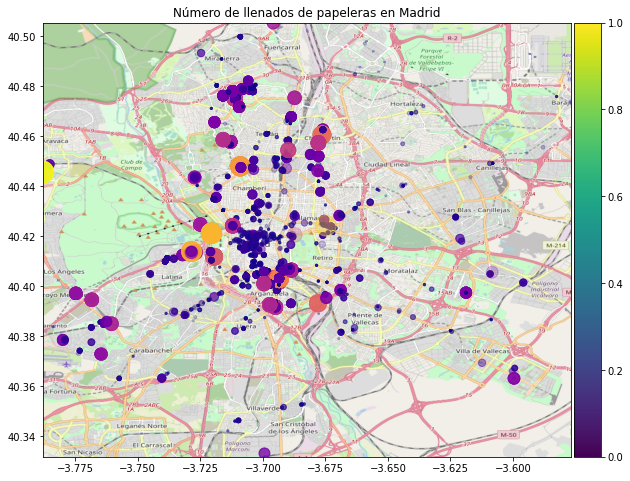

In [17]:

papeleras_llenas = df.loc[df['alerta'] == 'LLENA']
veces_llenas = papeleras_rotas.groupby('idPapelera')['alerta'].count().reset_index(name='Count')
merged_llenas = pd.merge(left=papeleras_llenas, right=veces_llenas, left_on='idPapelera', right_on='idPapelera')

BBox = (papeleras_unicas.longitud.min(),   papeleras_unicas.longitud.max(),      
         papeleras_unicas.latitud.min(), papeleras_unicas.latitud.max())

mapa_madrid = plt.imread('./map.png')
fig, ax = plt.subplots(figsize = (10,10))
size = merged_llenas['Count'].to_numpy()
s = [5*s for s in size]
ax.scatter(merged_llenas.longitud, merged_llenas.latitud, zorder=1, alpha= 0.25, c=merged_llenas.Count, cmap='plasma', s=s)
ax.set_title('Número de llenados de papeleras en Madrid')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])

im = ax.imshow(mapa_madrid, zorder=0, extent = BBox, aspect= 'equal')
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax, orientation='vertical')

### Centro de Madrid
Este análisis previo lo hemos realizado en todas las papeleras solares inteligentes registradas en la totalidad de la ciudad de Madrid. Ahora, vamos a centrarnos en el centro de Madrid, para ver todo con más claridad.

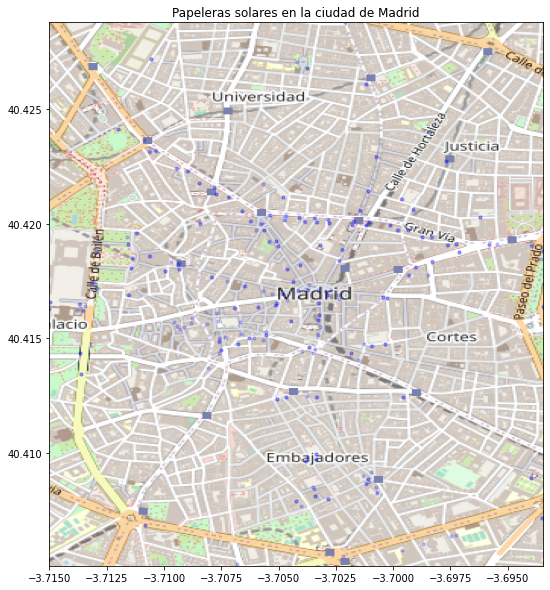

In [30]:
papeleras_centro = df.loc[df['latitud'] < 40.4288]
papeleras_centro = papeleras_centro.loc[papeleras_centro['latitud'] > 40.4047]
papeleras_centro = papeleras_centro.loc[papeleras_centro['longitud'] < -3.6933]
papeleras_centro = papeleras_centro.loc[papeleras_centro['longitud'] > -3.7153]

papeleras_unicas = papeleras_centro.drop_duplicates(subset=['idPapelera'])

BBox = (papeleras_unicas.longitud.min(),   papeleras_unicas.longitud.max(),      
         papeleras_unicas.latitud.min(), papeleras_unicas.latitud.max())

mapa_centro = plt.imread('./madrid_centro.png')

fig, ax = plt.subplots(figsize = (10,10))
ax.scatter(papeleras_unicas.longitud, papeleras_unicas.latitud, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Papeleras solares en la ciudad de Madrid')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(mapa_centro, zorder=0, extent = BBox, aspect= 'equal')

Ahora veamos los errores de las papeleras en el centro:

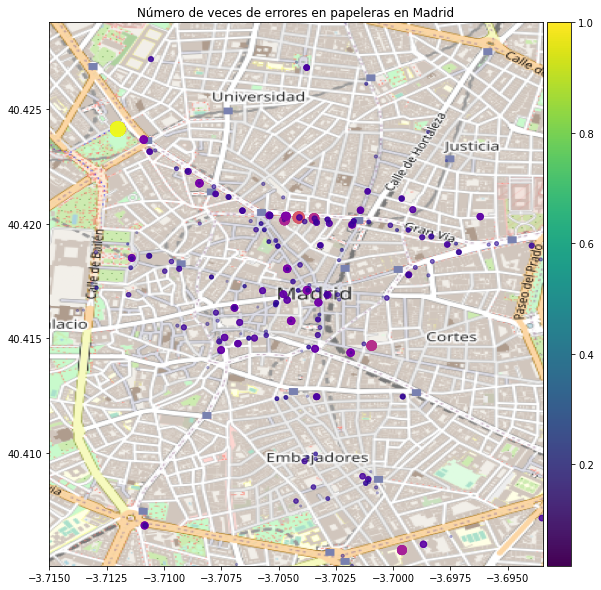

In [31]:
papeleras_rotas = papeleras_centro.loc[papeleras_centro['alerta'] == 'ERROR']
veces_rotas = papeleras_rotas.groupby('idPapelera')['alerta'].count().reset_index(name='Count')
merged_rotas = pd.merge(left=papeleras_rotas, right=veces_rotas, left_on='idPapelera', right_on='idPapelera')

BBox = (papeleras_unicas.longitud.min(),   papeleras_unicas.longitud.max(),      
         papeleras_unicas.latitud.min(), papeleras_unicas.latitud.max())

fig, ax = plt.subplots(figsize = (10,10))
size = merged_rotas['Count'].to_numpy()
s = [5*s for s in size]
ax.scatter(merged_rotas.longitud, merged_rotas.latitud, zorder=1, alpha= 0.25, c=merged_rotas.Count, cmap='plasma', s=s)
ax.set_title('Número de veces de errores en papeleras en Madrid centro')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
im = ax.imshow(mapa_centro, zorder=0, extent = BBox, aspect= 'equal')

divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax, orientation='vertical')

A continuación, podemos ver con más detenimiento las veces que se han llenado las papeleras del centro:

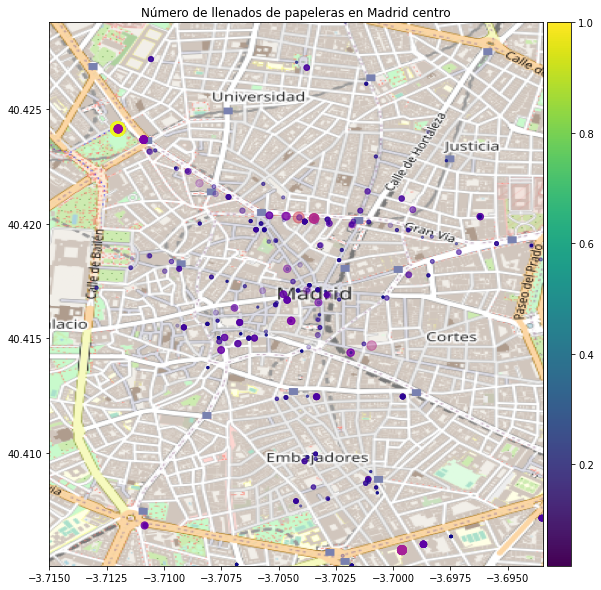

In [54]:
papeleras_llenas = papeleras_centro.loc[papeleras_centro['alerta'] == 'LLENA']
veces_llenas = papeleras_rotas.groupby('idPapelera')['alerta'].count().reset_index(name='Count')
merged_llenas = pd.merge(left=papeleras_llenas, right=veces_llenas, left_on='idPapelera', right_on='idPapelera')

BBox = (papeleras_unicas.longitud.min(),   papeleras_unicas.longitud.max(),      
         papeleras_unicas.latitud.min(), papeleras_unicas.latitud.max())

fig, ax = plt.subplots(figsize = (10,10))
size = merged_llenas['Count'].to_numpy()
s = [5*s for s in size]
ax.scatter(merged_llenas.longitud, merged_llenas.latitud, zorder=1, alpha= 0.25, c=merged_llenas.Count, cmap='plasma', s=s)
ax.set_title('Número de llenados de papeleras en Madrid centro')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])

divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax, orientation='vertical')
im = ax.imshow(mapa_centro, zorder=0, extent = BBox, aspect= 'equal')

# Modelo Serie Temporal
A modo de demostración se van a aplicar técnicas de predicción de series temporal sobre la papelera que más entradas presenta en la base de datos, Gran Via 31. Aclarar que estos modelos se exponen a modo de demostración de lo que es posible si se tuviera acceso a un mayor histórico de datos. Para la realización de este trabajo solo se ha tenido acceso a los datos correspondientes a un mes cuando lo ideal es el de varios años.


In [18]:
from datetime import datetime
papelera1['date_by_hour'] = papelera1['fecha'].apply(lambda x: x.strftime('%Y-%m-%d %H:00'))
papelera1['date_by_hour']=pd.to_datetime(papelera1['date_by_hour'])
datos = papelera1.set_index('date_by_hour')

datos = pd.DataFrame(datos["nivelLlenado"])
datos.index

DatetimeIndex(['2022-03-05 11:00:00', '2022-03-06 17:00:00',
               '2022-03-06 18:00:00', '2022-03-06 23:00:00',
               '2022-03-07 00:00:00', '2022-03-07 02:00:00',
               '2022-03-07 03:00:00', '2022-03-07 04:00:00',
               '2022-03-07 06:00:00', '2022-03-07 08:00:00',
               ...
               '2022-03-30 20:00:00', '2022-03-30 23:00:00',
               '2022-03-31 01:00:00', '2022-03-31 02:00:00',
               '2022-03-31 04:00:00', '2022-03-31 05:00:00',
               '2022-03-31 07:00:00', '2022-03-31 08:00:00',
               '2022-03-31 10:00:00', '2022-03-31 11:00:00'],
              dtype='datetime64[ns]', name='date_by_hour', length=351, freq=None)

In [19]:
#convert to time series:
ts = datos['nivelLlenado']

ts.head(10)

date_by_hour
2022-03-05 11:00:00    0
2022-03-06 17:00:00    2
2022-03-06 18:00:00    2
2022-03-06 23:00:00    2
2022-03-07 00:00:00    2
2022-03-07 02:00:00    2
2022-03-07 03:00:00    2
2022-03-07 04:00:00    2
2022-03-07 06:00:00    2
2022-03-07 08:00:00    2
Name: nivelLlenado, dtype: int64

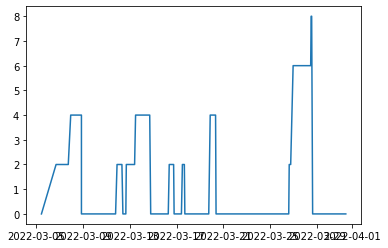

In [20]:
plt.plot(ts)

A primera vista podemos deducir que al disponer de tan pocos datos, la serie temporal no presenta conducta tendencial estocástica.
Esto se puede confirmar con el test de Dickey-Fuller.
El test de Dickey-Fuller tiene como hipótesis nula:

 - La serie temporal no es estacionaria

Para ello se va usar una función adaptada del este [tutorial](https://medium.com/@stallonejacob/time-series-forecast-a-basic-introduction-using-python-414fcb963000)

In [21]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
#Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

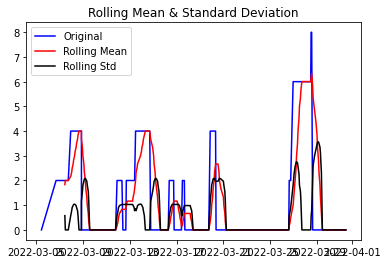

Results of Dickey-Fuller Test:
Test Statistic                  -3.728733
p-value                          0.003727
#Lags Used                       0.000000
Number of Observations Used    350.000000
Critical Value (1%)             -3.449173
Critical Value (5%)             -2.869833
Critical Value (10%)            -2.571188
dtype: float64


In [22]:
test_stationarity(ts)

El test de Dickey-Fuller devuelve un p-valor de 0.003 < 0.05, por lo que se puede decir que la serie temporal es estacionaria.

Se va crear a modo de demostración un modelo ARIMA con los datos de la papelera de Gran Vía 31

d:\Proyectos\visuales_datos2\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Proyectos\visuales_datos2\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Proyectos\visuales_datos2\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


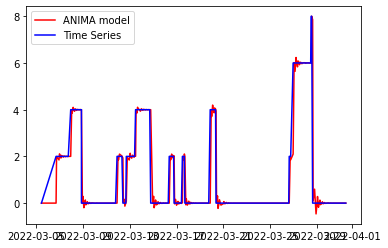

In [25]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(ts,order=(2,1,2))
results = model.fit()
residuals = pd.DataFrame(results.resid)
plt.plot(results.fittedvalues,color='red',label='ARIMA model')
plt.plot(ts,color='blue',label='Time Series')
plt.legend(loc='best')


Se puede apreciar que el modelo ARIMA extraido se ha sobreajustado a los datos, por lo que no es un buen modelo.